In [2]:
# import os module
import os

# import AUTO modules
from auto import AUTOCommands as ac
from auto import AUTOclui as acl
from auto import interactiveBindings as ib
from auto import runAUTO as ra

# import plotting tools
import matplotlib as mpl
from matplotlib import pyplot as plt

# virtual display to use AUTO plot function (pyplot)
from pyvirtualdisplay import Display
from IPython.display import display as display
from PIL import Image
disp = Display(visible=0, size=(1366,768))
disp.start()

In [3]:
# use working directory for demo to avoid clutter
folder = '/auto/workspace/demos/demo'
os.chdir(folder)

In [4]:
# copy demo into current directory
ac.copydemo('sh-half')

# start AUTO with runner object
runner = ra.runAUTO()


pgm = "sh-half"
print("\nDemo %s is started"%pgm)
print("\n%s : first run : following the first snaking curve"%pgm)
r1 = ac.run(e=pgm,c=pgm,NMX=300,runner=runner)
ac.save(r1, 'run1') 




Copying demo sh-half ... done

Demo sh-half is started

sh-half : first run : following the first snaking curve
gfortran -fopenmp -O -c sh-half.f90 -o sh-half.o
gfortran -fopenmp -O sh-half.o -o sh-half.exe /auto/lib/*.o
Starting sh-half ...

  BR    PT  TY  LAB    PAR(1)        L2-NORM       MAX U(1)      MAX U(2)      MAX U(3)      MAX U(4)   
   1     1  EP    1   2.00000E-01   5.24380E-01   1.10378E+00   7.82024E-01   6.60058E-01   8.77432E-01
   1    10        2   2.04394E-01   5.23034E-01   1.08749E+00   7.95019E-01   6.61272E-01   8.88225E-01
   1    20        3   1.96435E-01   5.40190E-01   1.11171E+00   8.11026E-01   6.73252E-01   9.04244E-01
   1    30        4   1.85233E-01   5.62287E-01   1.14228E+00   8.30917E-01   6.88179E-01   9.24183E-01
   1    34  LP    5   1.84010E-01   5.67050E-01   1.14542E+00   8.32997E-01   6.89709E-01   9.26214E-01
   1    40        6   1.89692E-01   5.69260E-01   1.13058E+00   8.23419E-01   6.82547E-01   9.16638E-01
   1    50        7   2.0514

Created plot


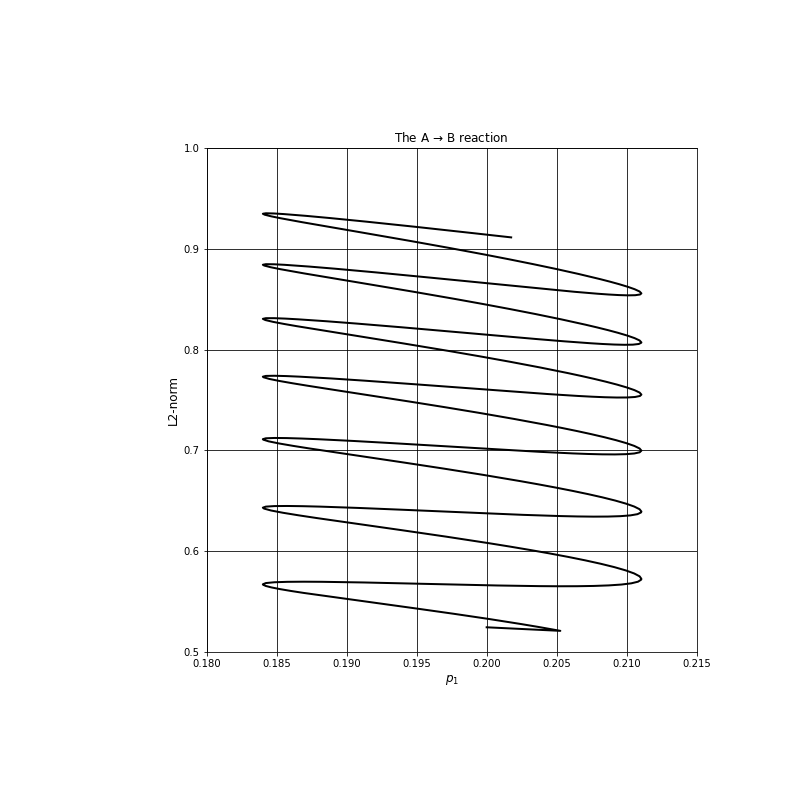

Created plot


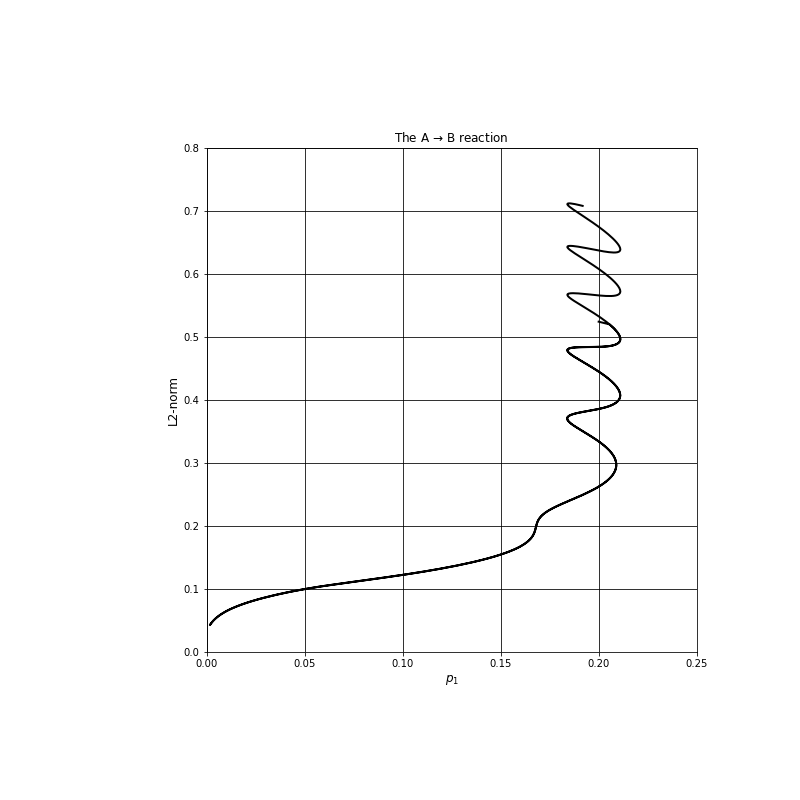

In [158]:
# plot bifurcation diagram using plot routine from AUTO

p1 = ac.plot('run1')
p1.savefig('b1.png')
display(Image.open('b1.png'))

p2 = ac.plot('run2')
p2.savefig('b2.png')
display(Image.open('b2.png'))

In [11]:
# clean up files
# do not run this if you want to produce the figures below 

ac.clean()
ac.delete('run1')
ac.delete('run2')

Deleting fort.* *.o *.exe *.*~ ... done
Deleting b.lor ... done
Deleting s.lor ... done
Deleting d.lor ... done


In [5]:
### Creating a folder to put the figures in 
import numpy as np
import os 
folder_name = 'figures'
folder_path = '/auto/workspace/demos/demo/figures'
os.makedirs(os.path.join(folder_path, folder_name))



# Now we parse various files 
sol = ac.sl('run1')  # Auto command to parse the solution file into the object 'sol' 
np.shape(sol('U(1)'))  
sol(1)['PAR(1)']  # This gives the value of the parameter mu at the first recorded solution 
sol(1)['U(1)']  # This extracts the 1601 data points corresponding of u(1) corresponding to the first solution 
sol(2)['U(1)']  # Same for the second solution 
sol(1)["t"]  # Extracts the independent variable from our solution 

b1 = ac.dg('run1')  # Auto command to parse the bifurcation diagram file into the object 'b1'
b1(1)["L2-NORM"]  # This gives the L2-NORM corresponding to the first recorded solution 




Parsed file: s.run1
Parsed file: b.run1


array([0.00000000e+00, 1.62365939e-04, 3.24731879e-04, ...,
       8.16128537e-01, 9.08064269e-01, 1.00000000e+00])

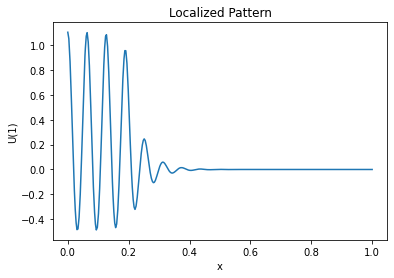

In [8]:
### Example plot: the first recorded solution U(1) 

import matplotlib.pyplot as plt
import numpy as np

plt.clf()

# Generating data 
x = sol(1)["t"]
y = sol(1)['U(1)']

# Create the plot 
plt.plot(x, y)
plt.title('Localized Pattern')
plt.xlabel('x')
plt.ylabel('U(1)')

# Display the plot
#plt.show() 
plt.savefig('Figures/u1_plot.png')

(3201,)


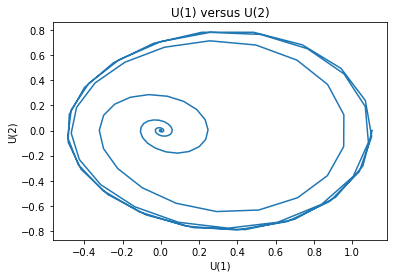

In [8]:
### Plotting U(1) (function value) versus U(2) (its derivative) 

import matplotlib.pyplot as plt
import numpy as np

plt.clf() 

# Generating data 
x = sol(1)['U(1)']
y = sol(1)['U(2)']
print(np.shape(x))

# Create the plot
plt.plot(x, y)
plt.title('U(1) versus U(2)')
plt.xlabel('U(1)')
plt.ylabel('U(2)')

# Display the plot
#plt.show() 
plt.savefig('Figures/u1vsu2.png')

<Figure size 432x288 with 0 Axes>

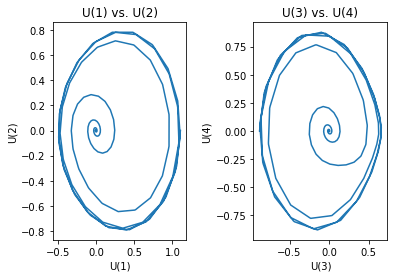

In [10]:
### Plotting U(1) versus U(2) and U(3) versus U(4) 

import matplotlib.pyplot as plt
import numpy as np

plt.clf()

# Generating data 
x1 = sol(1)["U(1)"]
x2 = sol(1)["U(2)"]
x3 = sol(1)["U(3)"]
x4 = sol(1)["U(4)"]
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2)

# Plot the first dataset on the first subplot
ax1.plot(x1,x2)
ax1.set_title('U(1) vs. U(2)')
ax1.set_xlabel('U(1)')
ax1.set_ylabel('U(2)')

# Plot the second dataset on the second subplot
ax2.plot(x3, x4)
ax2.set_title('U(3) vs. U(4)')
ax2.set_xlabel('U(3)')
ax2.set_ylabel('U(4)')
fig.subplots_adjust(wspace=0.5)  # Separate the plots 

# Show the figure
#plt.show() 
plt.savefig('Figures/u1u2u3u4.png')


In [194]:
### Creating an animation of U(1) vs. U(2) as we move along the branch 

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# Create figure and two subplots
fig, ax = plt.subplots()

# Set title and axes labels for the first subplot
ax.set_title("U(1) vs. U(2)")
ax.set_xlabel("U(1)")
ax.set_ylabel("U(2)")

# Initialize scatter plot
x = sol(1)["U(1)"]
y = sol(1)["U(2)"]
line, = ax.plot(x1,y1) 

# Function to update the plot for each frame
def animate(i):
    x = sol(i+1)["U(1)"]
    y = sol(i+1)["U(2)"]
    line.set_data(x, y)
    return line,

# Create the animation
ani = animation.FuncAnimation(fig, animate, frames=np.shape(sol)[0], blit=True)

# Save the animation as a .gif file
ani.save("Figures/u1u2gif.gif", writer="pillow", fps=20)


In [203]:
### Creating an animation of U(1) only as we move along the branch

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

# Create some data to plot
x = sol(1)["t"]
y_values = []
for i in range(np.shape(sol)[0]): 
    y_values.append(sol(i+1)["U(1)"])

# Create a figure and axis for the plot
fig, ax = plt.subplots()
line, = ax.plot(x, y_values[0])
ax.set_title("U(1)")
ax.set_xlabel("t")
ax.set_ylabel("U(1)")

# Define the update function for the animation
def update(frame):
    y = y_values[frame % len(y_values)]
    line.set_ydata(y)
    return line,


# Create the animation
ani = FuncAnimation(fig, update, frames=len(y_values)*2, interval=500, blit=True)

# Show the animation
ani.save('Figures/u1_gif.gif', writer='pillow', fps=20)


In [241]:
### Creating an animation of the solution point moving up the snaking curve 

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()

# Plot the snaking curve 
x = b1["PAR(1)"]
y = b1["L2-NORM"]
ax.plot(x, y)

# Initialize the point
point, = ax.plot([], [], 'o', color='r')

# Define the animation function
def animate(i):
    x = b1(i+1)["PAR(1)"]
    y = b1(i+1)["L2-NORM"]
    point.set_data([x], [y]) # Update the coordinates of the point
    return point,

# Create the animation
ani = FuncAnimation(fig, animate, frames=np.shape(sol)[0], interval=100)

# Display the animation
ani.save('Figures/snaking_point.gif', writer='pillow', fps=20)


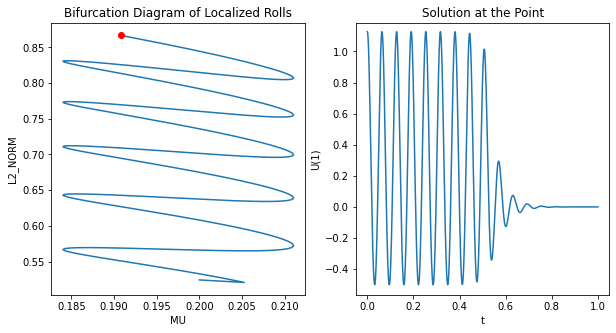

In [6]:
### Doing both animations at once

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Create the figure and two subplots
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10,5))

# Create the first animation on the left subplot
x1 = b1["PAR(1)"]
y1 = b1["L2-NORM"]
ax1.plot(x1, y1)
point, = ax1.plot([], [], 'o', color='r')

x2 = sol(1)["t"]
y2 = sol(1)["U(1)"]
line, = ax2.plot(x2,y2) 

# Annotating the plots
ax1.set_title("Bifurcation Diagram of Localized Rolls")
ax1.set_xlabel("MU")
ax1.set_ylabel("L2_NORM")
ax2.set_title("Solution at the Point")
ax2.set_xlabel("t")
ax2.set_ylabel("U(1)")

def animate(i):
    x1 = b1(i+1)["PAR(1)"]
    y1 = b1(i+1)["L2-NORM"]
    x2 = sol(i+1)["t"]
    y2 = sol(i+1)["U(1)"]
    point.set_data([x1], [y1]) # Update the coordinates of the point
    line.set_data(x2, y2)
    return point, line


ani = FuncAnimation(fig, animate, frames=np.shape(sol)[0], interval=50, blit=True)

# Save the animations
ani.save('Figures/testani.gif', writer='pillow', fps=20)

In [263]:
### Creating an animation of the trajectory of a point along the U(1) vs. U(2) curve 

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

plt.clf()
fig, ax = plt.subplots()

# Plot the curve
x = sol(1)["U(1)"]
y = sol(1)["U(2)"]
ax.plot(x, y)

# Initialize the point
point, = ax.plot([], [], 'o', color='r')

# Define the animation function
def animate(i):
    x = sol(1)["U(1)"][i]
    y = sol(1)["U(2)"][i]
    point.set_data([x], [y]) # Update the coordinates of the point
    return point,

# Create the animation
ani = FuncAnimation(fig, animate, frames=1601, interval=100)

# Display the animation
ani.save('Figures/u1_u2_point.gif', writer='pillow', fps=30)


In [303]:
### Plotting the snaking curve

import numpy as np
import matplotlib.pyplot as plt

plt.clf()
fig, ax = plt.subplots(figsize=(6, 6))
# Plot the snaking curve 
x = b1["PAR(1)"]
y = b1["L2-NORM"]
ax.plot(x, y)
ax.set_title('Bifurcation Diagram of Localized Rolls')
plt.xlabel('MU')
plt.ylabel('L2-NORM')
ax.set_aspect(1/8)

plt.savefig('Figures/Snaking_Curve.png')